In [1]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
model = tf.keras.models.load_model("catdog.model")


In [3]:
path = r'C:\Users\LENOVO IDEAPAD\Downloads\datasets\catdog\test1\test1'


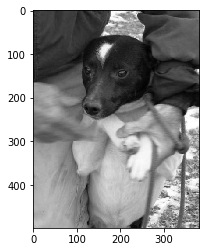

In [4]:
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break

In [5]:
test_data = []
def processin_the_testdata(path1):
    i =0
    img_size = 50
    for img in os.listdir(path1):
        i = i + 1
        if i % 500 == 0:
            print(i)
        img_array = cv2.imread(os.path.join(path1,img),cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(img_array,(img_size,img_size))
        test_data.append([new_arr])
       
        
        
        
          

In [6]:
processin_the_testdata(path)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500


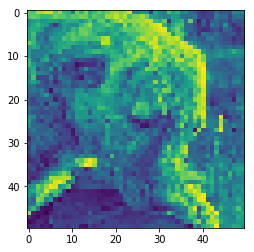

In [7]:
#checking the data

a = test_data[4][0]
plt.imshow(a)

In [8]:
img_size = 50
y = np.array(test_data).reshape(-1,img_size,img_size,1)
   

In [9]:
y[1].shape

(50, 50, 1)

4
prdiction : DOG


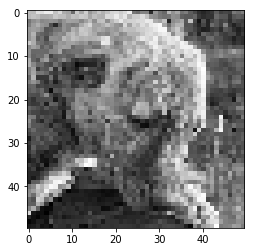

In [19]:
#checking one from testing dataset

j = int(input())
c = y[j]
plt.imshow(c.reshape(50,50),cmap = 'gray')
ans = model.predict(y[j].reshape(-1,50,50,1))

if ans[0][0] == 1.0:
    print('predition : CAT')
else:  
    print('prdiction : DOG')

In [20]:
predictions = model.predict(y)

In [167]:
# intialise data of lists. 
id1 = [i for i in range(1,12501)]

  

   

In [168]:
# Create DataFrame 
df = pd.DataFrame(columns = ['id' , 'label']) 

In [170]:
df['id'] = id1

In [177]:
for j in range(0,12500): 
    df['label'][j] =  int(predictions[j][0])

In [180]:
df.head()

,id,label
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [181]:
for k in range(0,12500):
    if df['label'][k] == 0.0:
        df['label'][k] = 1.0
    else:
        df['label'][k] = 0.0
        

In [184]:
df.count()

id       12500
label    12500
dtype: int64

In [185]:
df.to_csv('catdogg_SUB.csv',index=False)

